In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

## Data Processing

In [2]:
#Reading the CSV file
df=pd.read_csv('Data.csv')
df.head()

,Unnamed: 0,desy_sort_key,gender_id,Diabetes,COPD,CKD,PVD,CAD,HyperTension,DiseaseType,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
0,0,118683983,F,0,0,0,0,0,1,2,...,226.513751,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130
1,1,130289775,F,1,0,0,0,0,0,1,...,212.915038,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523
2,2,108632239,F,0,0,0,0,0,1,2,...,134.289605,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951
3,3,117485425,M,0,0,0,0,0,1,2,...,255.366937,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312
4,4,129416237,F,0,0,0,0,0,1,2,...,160.118262,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217


In [3]:
#dopping/Removing the Unnamed column from the DataFrame.
col_names = df.columns
df = df.drop(df.columns[0],axis=1)
for c in col_names:
    df = df.replace("?", np.NaN)
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df

,desy_sort_key,gender_id,Diabetes,COPD,CKD,PVD,CAD,HyperTension,DiseaseType,Age,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
0,118683983,F,0,0,0,0,0,1,2,39,...,226.513751,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130
1,130289775,F,1,0,0,0,0,0,1,55,...,212.915038,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523
2,108632239,F,0,0,0,0,0,1,2,65,...,134.289605,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951
3,117485425,M,0,0,0,0,0,1,2,45,...,255.366937,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312
4,129416237,F,0,0,0,0,0,1,2,49,...,160.118262,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,130463331,F,0,0,0,0,0,1,2,63,...,209.861854,75.989096,4.910732,0.309312,0.926722,88.345341,0.992298,163.534873,18.825341,18.193768
13595,122447079,F,0,0,0,0,0,1,2,63,...,222.466384,57.523097,3.998451,0.311538,0.994377,90.272900,0.974632,113.836186,18.501758,14.946505
13596,111252359,M,0,0,0,0,0,1,2,68,...,136.684044,46.968360,5.791770,0.019826,0.717862,88.156215,0.999017,166.307136,18.566059,8.956338
13597,115838463,F,0,0,0,0,0,0,7,35,...,191.077492,83.970935,0.839396,0.356834,0.846148,90.874810,0.957968,138.261027,18.381755,9.482867


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (13599, 30)


In [5]:
df=df.drop(columns=['desy_sort_key','gender_id','DiseaseType','race','Treated'],axis=1)


In [6]:
df

,Diabetes,COPD,CKD,PVD,CAD,HyperTension,Age,Hemoglobin_A1C,Random_Glucose,Fasting_Glucose,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
0,0,0,0,0,0,1,39,5.424227,139.418184,83.405258,...,226.513751,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130
1,1,0,0,0,0,0,55,10.638850,311.354333,234.105530,...,212.915038,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523
2,0,0,0,0,0,1,65,5.173542,139.553267,87.066844,...,134.289605,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951
3,0,0,0,0,0,1,45,5.009073,131.692556,78.450297,...,255.366937,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312
4,0,0,0,0,0,1,49,5.152320,126.881606,98.547996,...,160.118262,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0,0,0,0,0,1,63,5.487710,145.306845,84.743306,...,209.861854,75.989096,4.910732,0.309312,0.926722,88.345341,0.992298,163.534873,18.825341,18.193768
13595,0,0,0,0,0,1,63,5.158783,136.683426,89.887506,...,222.466384,57.523097,3.998451,0.311538,0.994377,90.272900,0.974632,113.836186,18.501758,14.946505
13596,0,0,0,0,0,1,68,5.023969,137.986204,81.360494,...,136.684044,46.968360,5.791770,0.019826,0.717862,88.156215,0.999017,166.307136,18.566059,8.956338
13597,0,0,0,0,0,0,35,5.176758,135.699074,81.554537,...,191.077492,83.970935,0.839396,0.356834,0.846148,90.874810,0.957968,138.261027,18.381755,9.482867


In [7]:
#getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diabetes                     13599 non-null  int64  
 1   COPD                         13599 non-null  int64  
 2   CKD                          13599 non-null  int64  
 3   PVD                          13599 non-null  int64  
 4   CAD                          13599 non-null  int64  
 5   HyperTension                 13599 non-null  int64  
 6   Age                          13599 non-null  int64  
 7   Hemoglobin_A1C               13599 non-null  float64
 8   Random_Glucose               13599 non-null  float64
 9   Fasting_Glucose              13599 non-null  float64
 10  BMI                          13599 non-null  float64
 11  Systolic_BP                  13599 non-null  float64
 12  Diastolic_BP                 13599 non-null  float64
 13  HDL_C           

In [8]:
#Checking if any missing value in the dataframe
df.isnull().sum()

Diabetes                       0
COPD                           0
CKD                            0
PVD                            0
CAD                            0
HyperTension                   0
Age                            0
Hemoglobin_A1C                 0
Random_Glucose                 0
Fasting_Glucose                0
BMI                            0
Systolic_BP                    0
Diastolic_BP                   0
HDL_C                          0
LDL_C                          0
Total_Cholesterol              0
Triglycerides                  0
COPDAssesstmet_Test            0
nMRC                           0
FEV1/FVC_Ratio                 0
FEV1                           0
serum_creatinine               0
gfr                            0
blood_urea_nitrogen            0
Albumin_to_creatinine_ratio    0
dtype: int64

In [9]:
#statistical measure about the data
df.describe()

,Diabetes,COPD,CKD,PVD,CAD,HyperTension,Age,Hemoglobin_A1C,Random_Glucose,Fasting_Glucose,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
count,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,...,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000
mean,0.033164,0.081403,0.060372,0.005736,0.034708,0.523862,56.766453,5.197939,133.338809,92.347548,...,191.331951,64.102900,5.482397,0.642758,0.860364,88.315721,1.125293,129.769026,19.138879,22.344230
std,0.179072,0.273463,0.238184,0.075520,0.183047,0.499449,16.353595,0.556971,16.301535,15.803241,...,43.788761,27.646785,5.224630,0.563984,0.180649,6.198480,0.659812,29.935943,3.971317,36.446322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,4.009600,109.873256,72.013652,...,100.083243,20.016576,0.000575,0.000061,0.000011,50.451565,0.910218,18.905459,4.355299,0.010374
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,4.959152,127.837873,84.088067,...,157.135280,57.523097,2.225297,0.362378,0.748167,89.156330,0.980277,112.563991,18.346122,11.519935
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,57.000000,5.155112,132.136178,91.260195,...,191.391267,63.827040,4.910732,0.521668,0.846148,89.893511,0.996609,132.715226,18.512046,15.401780
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.000000,5.364500,136.382638,99.198341,...,223.696462,69.436327,7.255807,0.697954,0.959523,90.554378,1.014713,153.061604,18.682373,19.603653
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,11.533923,325.866227,274.731917,...,290.194777,296.227238,39.563789,3.985624,1.447107,93.261864,6.492862,179.980299,35.356934,309.876770


## Feature Engineering

In [10]:
# A categorical variable creation process is performed according to the value.
def Classlevel(row):
    if (row["COPDAssesstmet_Test"] >= 21 and row["COPDAssesstmet_Test"] <= 40):
        return "Critical"
    elif (row["COPDAssesstmet_Test"] >= 11 and row["COPDAssesstmet_Test"] <= 20 ):
        return "Early on set"
    else:
        return "No Risk"

In [11]:
# The operation performed was added to the dataframe.
df = df.assign(ClassLevel=df.apply(Classlevel, axis=1))

df

,Diabetes,COPD,CKD,PVD,CAD,HyperTension,Age,Hemoglobin_A1C,Random_Glucose,Fasting_Glucose,...,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio,ClassLevel
0,0,0,0,0,0,1,39,5.424227,139.418184,83.405258,...,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130,No Risk
1,1,0,0,0,0,0,55,10.638850,311.354333,234.105530,...,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523,No Risk
2,0,0,0,0,0,1,65,5.173542,139.553267,87.066844,...,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951,No Risk
3,0,0,0,0,0,1,45,5.009073,131.692556,78.450297,...,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312,No Risk
4,0,0,0,0,0,1,49,5.152320,126.881606,98.547996,...,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0,0,0,0,0,1,63,5.487710,145.306845,84.743306,...,75.989096,4.910732,0.309312,0.926722,88.345341,0.992298,163.534873,18.825341,18.193768,No Risk
13595,0,0,0,0,0,1,63,5.158783,136.683426,89.887506,...,57.523097,3.998451,0.311538,0.994377,90.272900,0.974632,113.836186,18.501758,14.946505,No Risk
13596,0,0,0,0,0,1,68,5.023969,137.986204,81.360494,...,46.968360,5.791770,0.019826,0.717862,88.156215,0.999017,166.307136,18.566059,8.956338,No Risk
13597,0,0,0,0,0,0,35,5.176758,135.699074,81.554537,...,83.970935,0.839396,0.356834,0.846148,90.874810,0.957968,138.261027,18.381755,9.482867,No Risk


In [12]:
df['ClassLevel'].value_counts()

No Risk         12701
Early on set      460
Critical          438
Name: ClassLevel, dtype: int64

## Label Encoding

In [13]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['ClassLevel'])
 
# printing label
label

array([2, 2, 2, ..., 2, 2, 2])

In [14]:
# removing the column 'Purchased' from df
# as it is of no use now.
df.drop("ClassLevel", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
df["ClassLevel"] = label
 
# printing Dataframe
df

,Diabetes,COPD,CKD,PVD,CAD,HyperTension,Age,Hemoglobin_A1C,Random_Glucose,Fasting_Glucose,...,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio,ClassLevel
0,0,0,0,0,0,1,39,5.424227,139.418184,83.405258,...,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130,2
1,1,0,0,0,0,0,55,10.638850,311.354333,234.105530,...,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523,2
2,0,0,0,0,0,1,65,5.173542,139.553267,87.066844,...,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951,2
3,0,0,0,0,0,1,45,5.009073,131.692556,78.450297,...,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312,2
4,0,0,0,0,0,1,49,5.152320,126.881606,98.547996,...,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0,0,0,0,0,1,63,5.487710,145.306845,84.743306,...,75.989096,4.910732,0.309312,0.926722,88.345341,0.992298,163.534873,18.825341,18.193768,2
13595,0,0,0,0,0,1,63,5.158783,136.683426,89.887506,...,57.523097,3.998451,0.311538,0.994377,90.272900,0.974632,113.836186,18.501758,14.946505,2
13596,0,0,0,0,0,1,68,5.023969,137.986204,81.360494,...,46.968360,5.791770,0.019826,0.717862,88.156215,0.999017,166.307136,18.566059,8.956338,2
13597,0,0,0,0,0,0,35,5.176758,135.699074,81.554537,...,83.970935,0.839396,0.356834,0.846148,90.874810,0.957968,138.261027,18.381755,9.482867,2


## 2 ---- No Risk 1 ------Early on set 0 ------ Critical

In [15]:
df['ClassLevel'].value_counts()

2    12701
1      460
0      438
Name: ClassLevel, dtype: int64

## Splitting the Features and ClassLevel

In [16]:
X=df.drop(columns='ClassLevel',axis=1)
y=df['ClassLevel']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 2)

In [18]:
print(X.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(13599, 25) (10879, 25) (2720, 25) (10879,) (2720,)


## LR

In [19]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/chandrasekar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# model predictions

y_pred2 = log_reg.predict(X_test)

Text(0, 0.5, 'prediction')

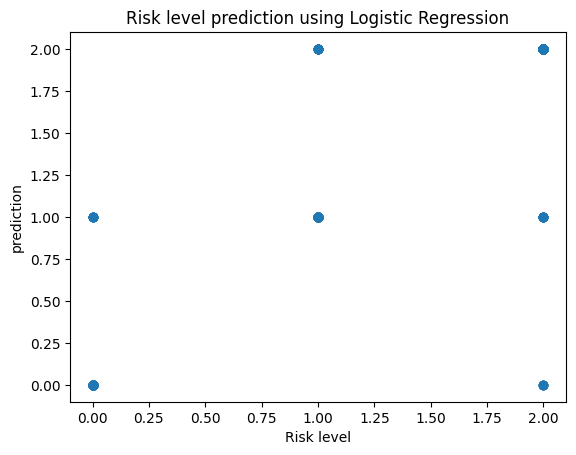

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred2)
plt.title("Risk level prediction using Logistic Regression")
plt.xlabel("Risk level")
plt.ylabel("prediction")

In [22]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.9915433403805497
0.9863970588235295


In [23]:
# confusion matrix

print(confusion_matrix(y_test, y_pred2))

[[  80    8    0]
 [   0   78   14]
 [   5   10 2525]]


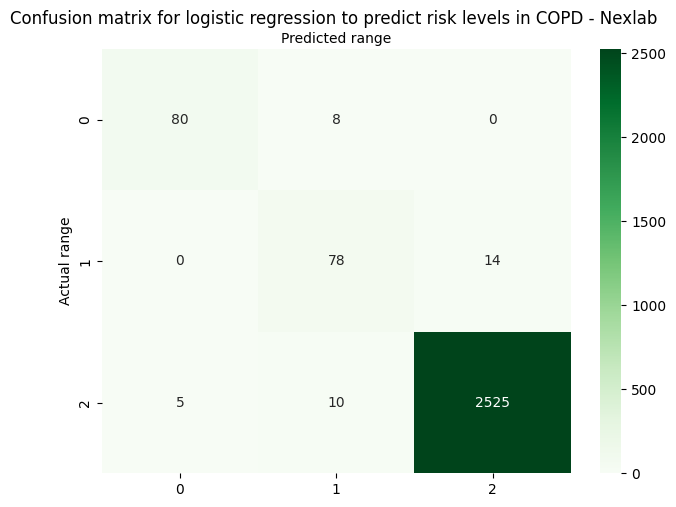

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred2)
class_names = [0,1,2]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression to predict risk levels in COPD - Nexlab ')
plt.ylabel('Actual range')
plt.xlabel('Predicted range')
plt.show()

In [25]:
# classification report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        88
           1       0.81      0.85      0.83        92
           2       0.99      0.99      0.99      2540

    accuracy                           0.99      2720
   macro avg       0.92      0.92      0.92      2720
weighted avg       0.99      0.99      0.99      2720



## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# model predictions 

y_pred1 = knn.predict(X_test)

Text(0, 0.5, 'prediction')

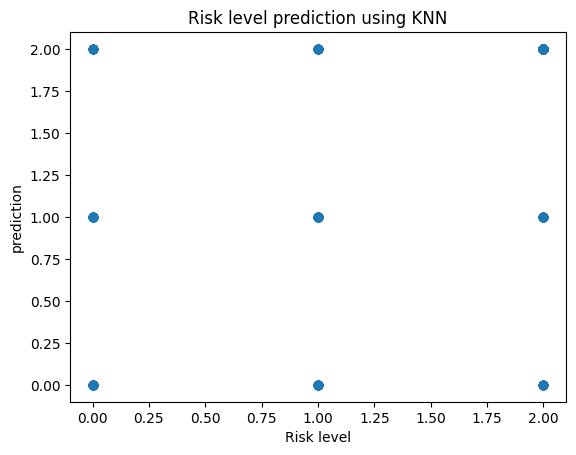

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred1)
plt.title("Risk level prediction using KNN")
plt.xlabel("Risk level")
plt.ylabel("prediction")

In [29]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9749057817814137
0.9522058823529411


In [30]:
# classification report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50        88
           1       0.42      0.45      0.43        92
           2       0.99      0.99      0.99      2540

    accuracy                           0.95      2720
   macro avg       0.65      0.63      0.64      2720
weighted avg       0.95      0.95      0.95      2720



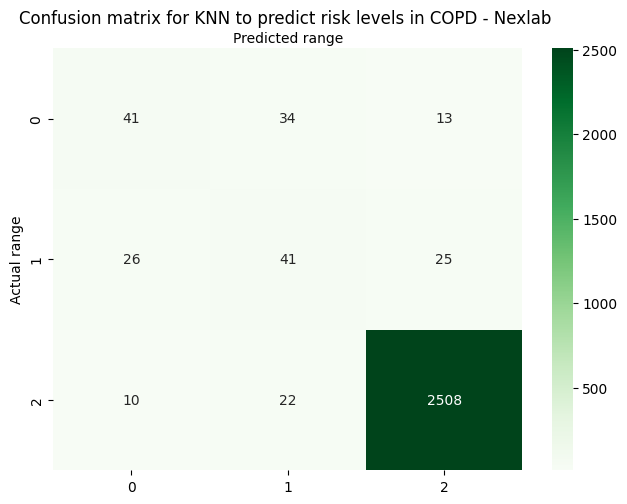

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred1)
class_names = [0,1,2]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for KNN to predict risk levels in COPD - Nexlab ')
plt.ylabel('Actual range')
plt.xlabel('Predicted range')
plt.show()

In [32]:
# classification report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50        88
           1       0.42      0.45      0.43        92
           2       0.99      0.99      0.99      2540

    accuracy                           0.95      2720
   macro avg       0.65      0.63      0.64      2720
weighted avg       0.95      0.95      0.95      2720



## RF

In [33]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)


/home/chandrasekar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [34]:
y_pred = rand_clf.predict(X_test)

Text(0, 0.5, 'prediction')

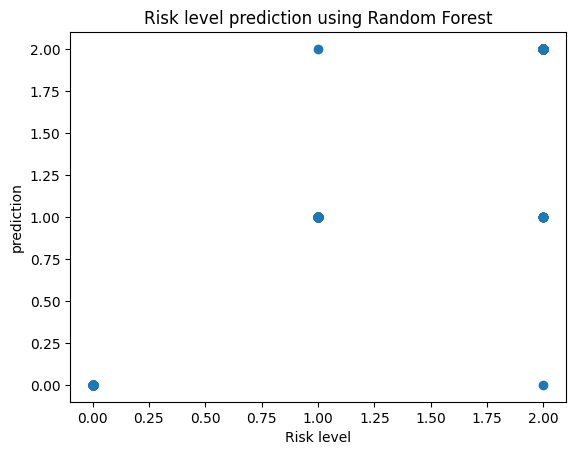

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.title("Risk level prediction using Random Forest")
plt.xlabel("Risk level")
plt.ylabel("prediction")

In [36]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

1.0
0.9955882352941177


In [37]:


# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.90      0.99      0.94        92
           2       1.00      1.00      1.00      2540

    accuracy                           1.00      2720
   macro avg       0.96      0.99      0.98      2720
weighted avg       1.00      1.00      1.00      2720



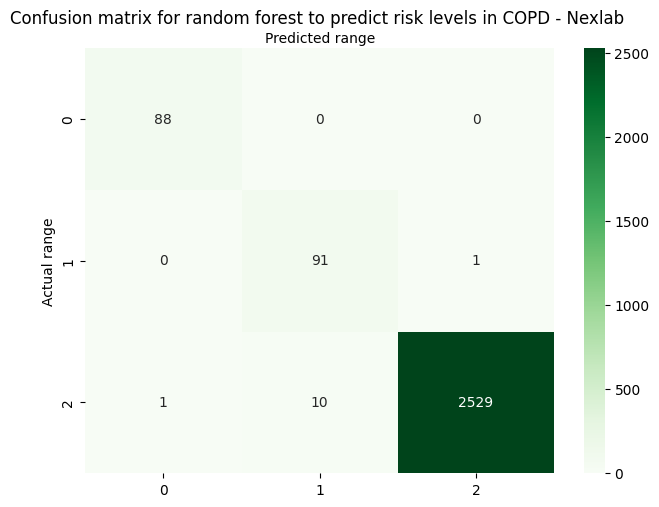

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1,2]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest to predict risk levels in COPD - Nexlab ')
plt.ylabel('Actual range')
plt.xlabel('Predicted range')
plt.show()

In [39]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.90      0.99      0.94        92
           2       1.00      1.00      1.00      2540

    accuracy                           1.00      2720
   macro avg       0.96      0.99      0.98      2720
weighted avg       1.00      1.00      1.00      2720



In [40]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(ran_clf_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,99.56
0,Logistic Regression,98.64
1,KNN,95.22


## Prediction Graph Of Three Models And Saving the Prediction Graph

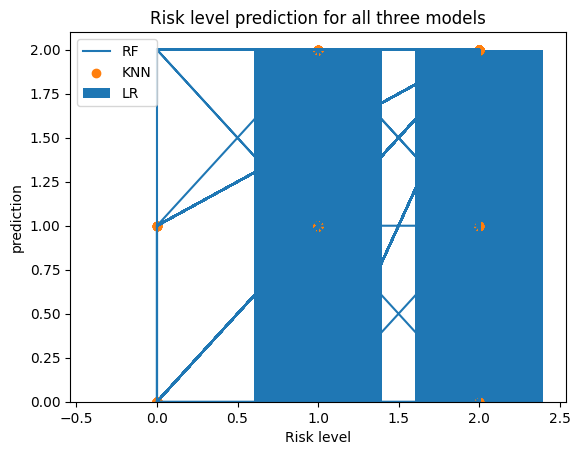

In [41]:
import matplotlib.pyplot as plt1
plt1.bar(y_test,y_pred)
plt1.plot(y_test,y_pred1)
plt1.scatter(y_test,y_pred2)
plt1.title("Risk level prediction for all three models")
plt1.xlabel("Risk level")
plt1.ylabel("prediction")
plt1.legend(('RF', 'KNN', 'LR'))
plt1.savefig("static/images/copdprediction.png")

In [42]:
import pickle
filename="copd.pkl"
model = rand_clf
f= open(filename,'wb')
pickle.dump(model, f)